In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv('../simulator/withML/result/result_withML_2000_10_1_2_labeled_iotrace_simulation_withFreq.csv')
requested_write = df['Requested Write']
additional_write = df['Additional Write']
df.head()

,Requested Write,Additional Write
0,0,0
1,10000,0
2,20000,0
3,30000,0
4,40000,0


In [6]:
def draw_graph(x, y, title, xlabel, ylabel):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    plt.title(title)
    plt.xticks(rotation=30)
    plt.xlabel(xlabel, fontsize=13, labelpad=15)
    plt.ylabel(ylabel, fontsize=13, labelpad=15)

    if title == 'Additional Write Diff Tendency':
        plt.axhline(0, color='red', linestyle='--', linewidth=0.8)  # y=0 위치에 빨간색 점선 추가

    # x축의 눈금을 1,000,000 형태로 설정
    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    if ylabel == 'Additional Write':
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: "{:,}".format(int(y))))

    plt.show()

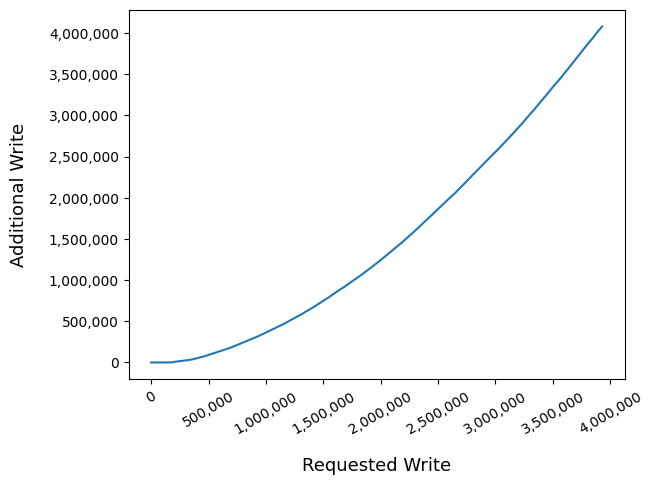

In [7]:
draw_graph(x=requested_write,
           y=additional_write,
           title='',
           xlabel='Requested Write',
           ylabel='Additional Write')

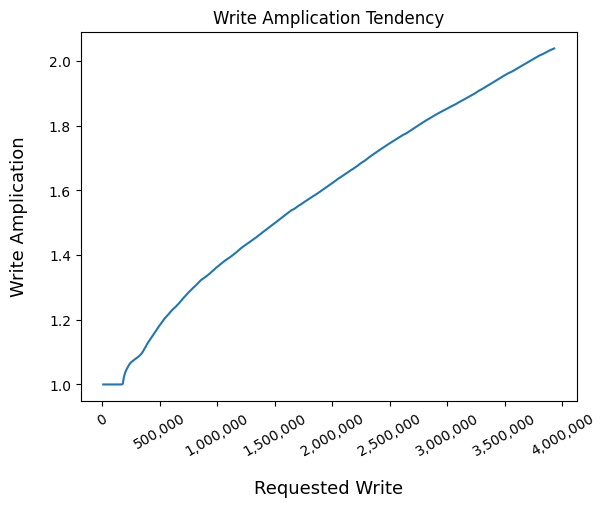

In [8]:
write_amplication = (requested_write + additional_write) / requested_write
draw_graph(x=requested_write,
           y=write_amplication,
           title='Write Amplication Tendency',
           xlabel='Requested Write',
           ylabel='Write Amplication')

## 초기에는 SSD가 비어있기 때문에 Write Amplication이 한동안 1로 시작한다.
## 이후 Requested Write가 많아질 수록 Write Amplication은 증가한다.
## 만약 I/O Trace가 더 많았다면, 최종 Write Amplication 수치는 더 높았을 것이다.

In [9]:
df2 = pd.read_csv('../simulator/withoutML/result/result_withoutML_2000_iotrace_simulation.csv')
requested_write2 = df2['Requested Write']
additional_write2 = df2['Additional Write']
df2.head()

,Requested Write,Additional Write
0,0,0
1,10000,0
2,20000,0
3,30000,0
4,40000,0


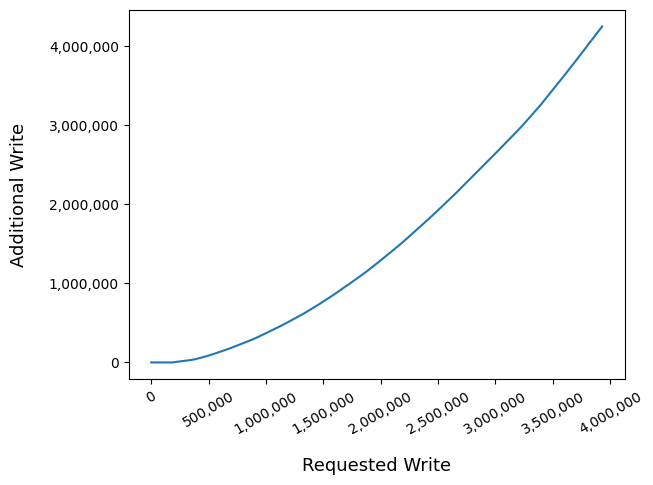

In [10]:
draw_graph(x=requested_write2,
           y=additional_write2,
           title='',
           xlabel='Requested Write',
           ylabel='Additional Write')

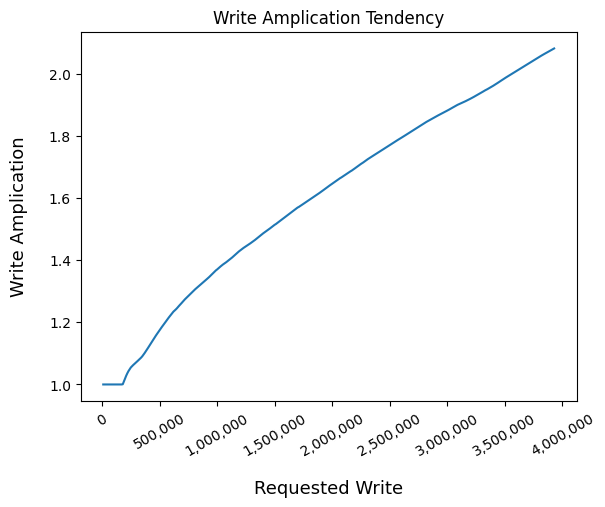

In [11]:
write_amplication2 = (requested_write2 + additional_write2) / requested_write2
draw_graph(x=requested_write2,
           y=write_amplication2,
           title='Write Amplication Tendency',
           xlabel='Requested Write',
           ylabel='Write Amplication')

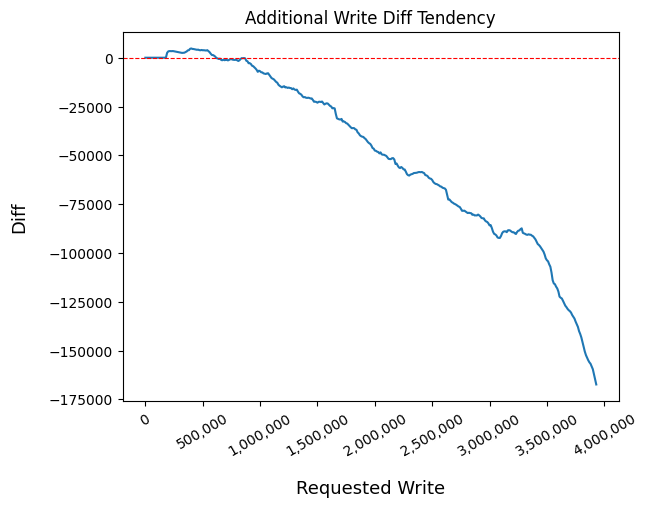

In [12]:
additional_write_diff = additional_write - additional_write2
draw_graph(x=requested_write,
           y=additional_write_diff,
           title='Additional Write Diff Tendency',
           xlabel='Requested Write',
           ylabel='Diff')